<a href="https://www.kaggle.com/code/pkmisra/02password-strength-checker?scriptVersionId=170679282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/passworddataset/password_data.sqlite


In [2]:
import sqlite3 

In [3]:
#sqlite connection
con = sqlite3.connect(r"/kaggle/input/passworddataset/password_data.sqlite")


In [4]:
data = pd.read_sql_query("SELECT * from Users",con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [7]:
#check for columns andremove unnecessary columns
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
#we can drop 'index'
data.drop(['index'], axis=1, inplace = True)

In [9]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [10]:
#check for duplicates
data.duplicated().sum()   #no duplicate

0

In [11]:
#check for null
data.isnull().any().sum()  #no null

0

In [12]:
#datatype
data.dtypes

password    object
strength     int64
dtype: object

In [13]:
data['strength'].unique()

array([1, 2, 0])

# Semantic Analysis

In [14]:
type(data['password'][0])

str

In [15]:
#Passwords holds only numeric charracters??
data[data['password'].str.isnumeric()].shape

(26, 2)

In [16]:
data[data['password'].str.isalpha()].shape #alpha characters password

(50, 2)

In [17]:
#password having alpha numeric charcters
data[data['password'].str.isalnum()].shape 

(97203, 2)

In [18]:
#password having uppercase character??
print(data[data['password'].str.isupper()].shape)

(1506, 2)


In [19]:
#passwords having some speical chaparcter
import string

In [20]:
string.punctuation  #to get the special charcters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def findSpecialCharacter(row):
    """define a function
    if any row has any of speical character
    then reutrn 1 else 0
    Input: Row """
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [22]:
data[data['password'].apply(findSpecialCharacter)==1].shape

(2663, 2)

Therefore the summary is: 
1. Only Numeric password: 26
2. Only Alpha passowrd: 50
3. Alpha Numeric: 97203
4. Having only uppercase: 1506
5. Having Special Characters: 2663

# Feature Engineeringn

- find the frequency of lowercase, uppercase, digit, frequency in passwords

In [23]:
def freqLower(row):
    return len([char for char in row if char.islower()])/len(row) #dividing with row to normalise it

In [24]:
def freqUpper(row):
    return len([char for char in row if char.isupper()])/len(row) #dividing with row to normalise it

In [25]:
def freqDigit(row):
    return len([char for char in row if char.isdigit()])/len(row) #dividing with row to normalise it

In [26]:
np.round(data['password'].apply(freqLower), 3)

0        0.333
1        0.417
2        0.778
3        0.783
4        0.625
         ...  
99995    0.700
99996    0.800
99997    0.778
99998    0.667
99999    0.727
Name: password, Length: 100000, dtype: float64

In [27]:
data['lowercaseFreq'] = np.round(data['password'].apply(freqLower), 3)
data['uppercaseFreq'] = np.round(data['password'].apply(freqUpper), 3)
data['digiFreq'] =np.round(data['password'].apply(freqDigit), 3)

In [28]:
data.head()

,password,strength,lowercaseFreq,uppercaseFreq,digiFreq
0,zxe870819,1,0.333,0.0,0.667
1,xw46454nr23l,1,0.417,0.0,0.583
2,soporte13,1,0.778,0.0,0.222
3,accounts6000webhost.com,2,0.783,0.0,0.174
4,c443balg,1,0.625,0.0,0.375


In [29]:
# for special charcter
def freqSpeicalChar(row):
    specialChar = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            specialChar.append(char)
    return len(specialChar)/len(row)

In [30]:
data['specialCharFreq'] = np.round(data['password'].apply(freqSpeicalChar),3)

In [31]:
data['length'] = data['password'].str.len()

In [32]:
data.head()

,password,strength,lowercaseFreq,uppercaseFreq,digiFreq,specialCharFreq,length
0,zxe870819,1,0.333,0.0,0.667,0.000,9
1,xw46454nr23l,1,0.417,0.0,0.583,0.000,12
2,soporte13,1,0.778,0.0,0.222,0.000,9
3,accounts6000webhost.com,2,0.783,0.0,0.174,0.043,23
4,c443balg,1,0.625,0.0,0.375,0.000,8


# Data Analysis

Performing Descriptive Statistics

In [33]:
data.columns

Index(['password', 'strength', 'lowercaseFreq', 'uppercaseFreq', 'digiFreq',
       'specialCharFreq', 'length'],
      dtype='object')

In [34]:
data[['length','strength']].groupby(['strength']).agg(["min", "max", "mean", "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

#### Descriptive Analysis

In [35]:
cols = ['lowercaseFreq', 'uppercaseFreq', 'digiFreq',
       'specialCharFreq', 'length']
for col in cols:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"]))
    print('\n')

lowercaseFreq
         lowercaseFreq                        
                   min    max      mean median
strength                                      
0                  0.0  1.000  0.708050  0.714
1                  0.0  0.923  0.630067  0.667
2                  0.0  0.917  0.424679  0.400


uppercaseFreq
         uppercaseFreq                        
                   min    max      mean median
strength                                      
0                  0.0  1.000  0.012872  0.000
1                  0.0  0.923  0.007915  0.000
2                  0.0  0.889  0.367633  0.429


digiFreq
         digiFreq                        
              min    max      mean median
strength                                 
0             0.0  1.000  0.275383  0.286
1             0.0  0.923  0.360123  0.333
2             0.0  0.895  0.193796  0.188


specialCharFreq
         specialCharFreq                        
                     min    max      mean median
strength                   

#### Box Plot Analysis


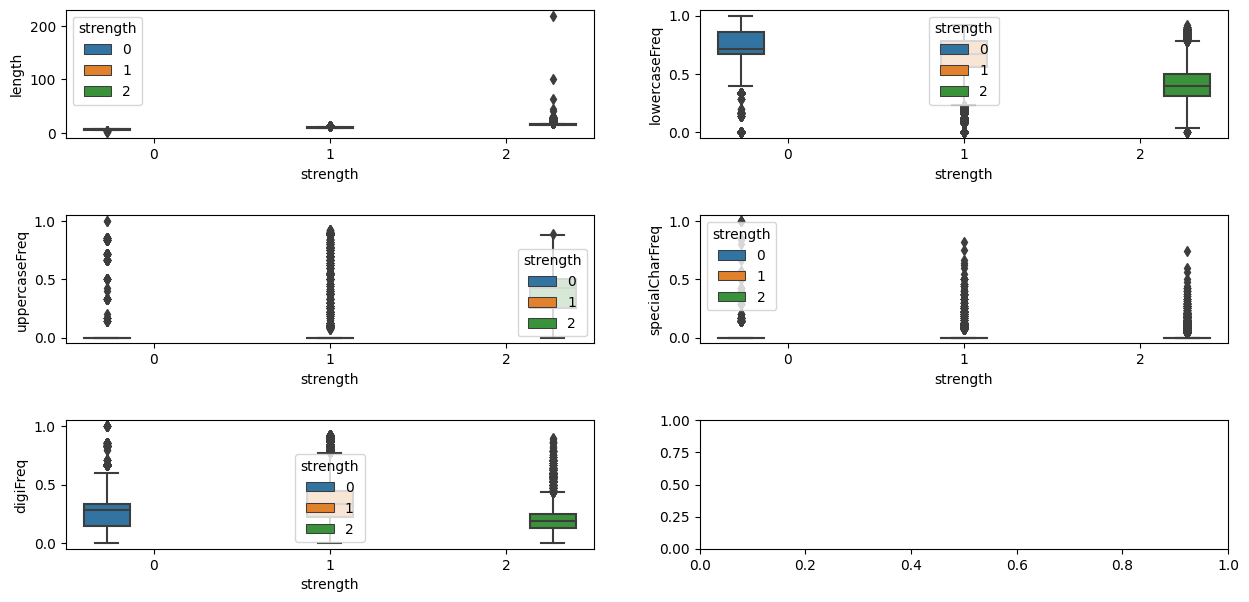

In [36]:
fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(15,7))

sns.boxplot(x="strength", y="length", hue="strength", ax=ax1, data=data)
sns.boxplot(x="strength", y="lowercaseFreq", hue="strength", ax=ax2, data=data)
sns.boxplot(x="strength", y="uppercaseFreq", hue="strength", ax=ax3, data=data)
sns.boxplot(x="strength", y="specialCharFreq", hue="strength", ax=ax4, data=data)
sns.boxplot(x="strength", y="digiFreq", hue="strength", ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

## Feature Importnce


- will use Univariate Analysis(taking one variable at atime)

In [37]:
def getDist(data, feature):
    plt.figure(figsize=(10,8))
    #violinplot
    plt.subplot(1,2,1)
    sns.violinplot(x='strength', y=feature, data=data)
    #distplot
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature], color='red', label='0', hist=False)
    sns.distplot(data[data['strength']==1][feature], color='blue', label='1', hist=False)
    sns.distplot(data[data['strength']==2][feature], color='orange', label='2', hist=False)
   

In [38]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

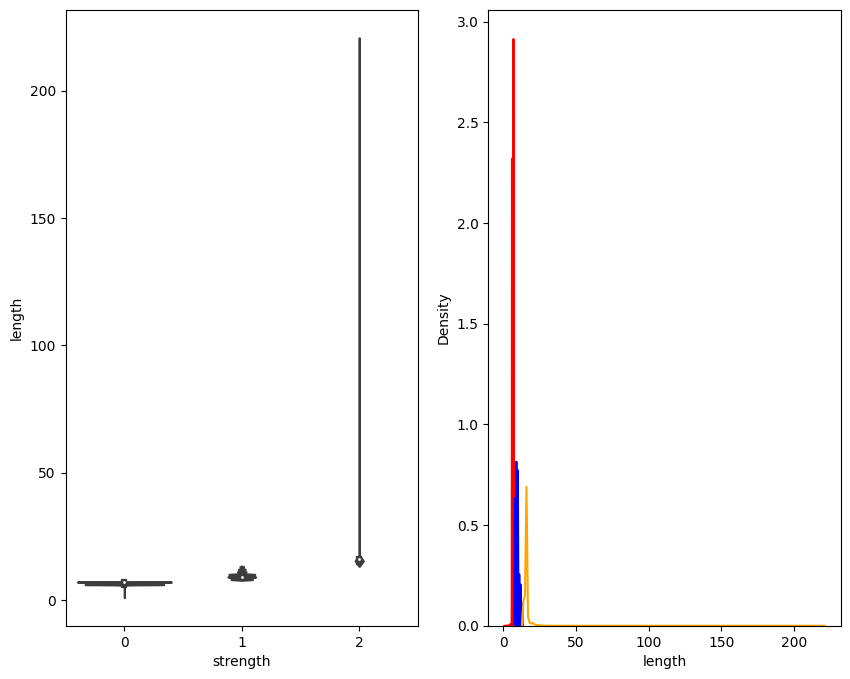

In [39]:
getDist(data, 'length')

In [40]:
data.columns

Index(['password', 'strength', 'lowercaseFreq', 'uppercaseFreq', 'digiFreq',
       'specialCharFreq', 'length'],
      dtype='object')

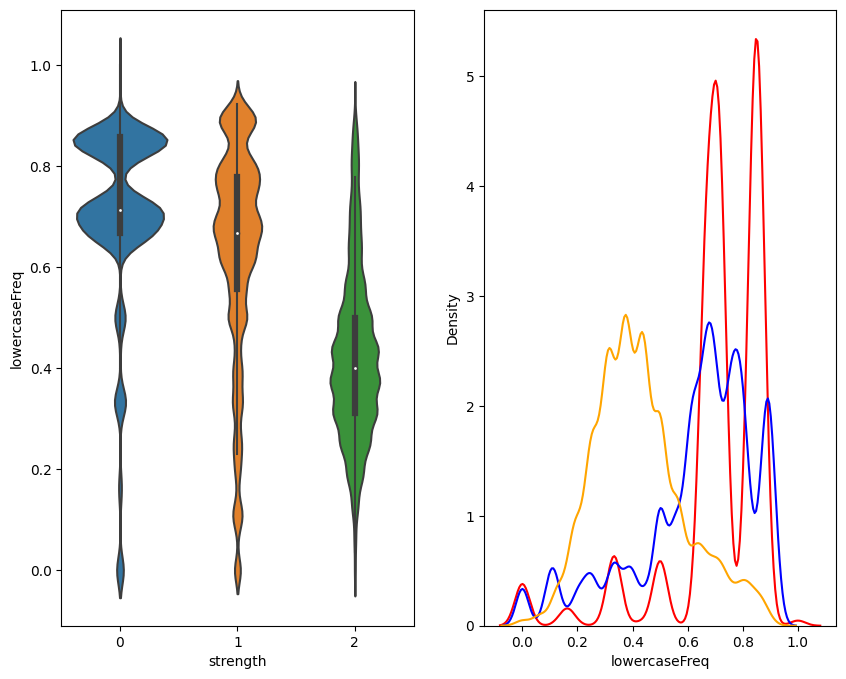

In [41]:
getDist(data,'lowercaseFreq')

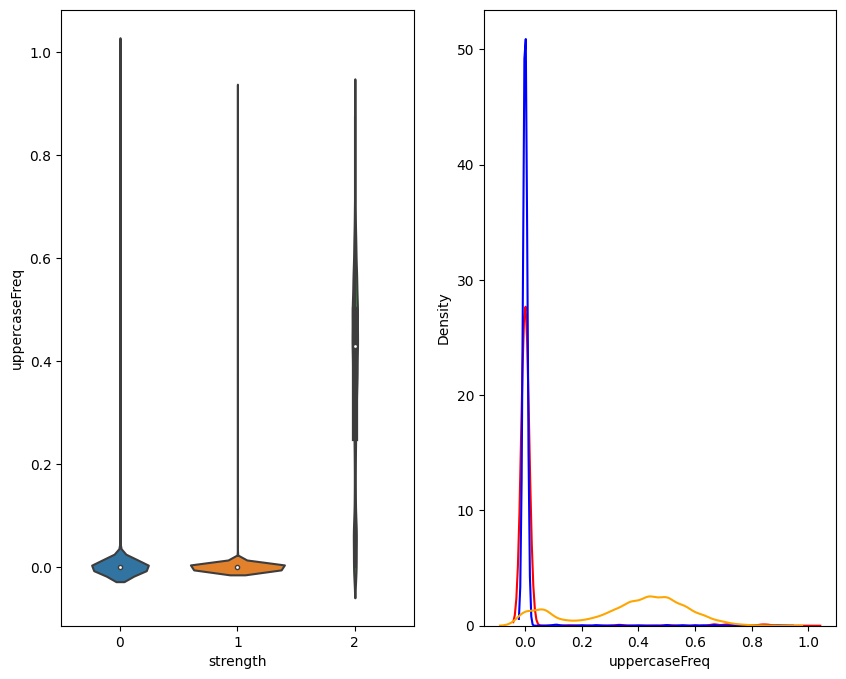

In [42]:
getDist(data, 'uppercaseFreq')

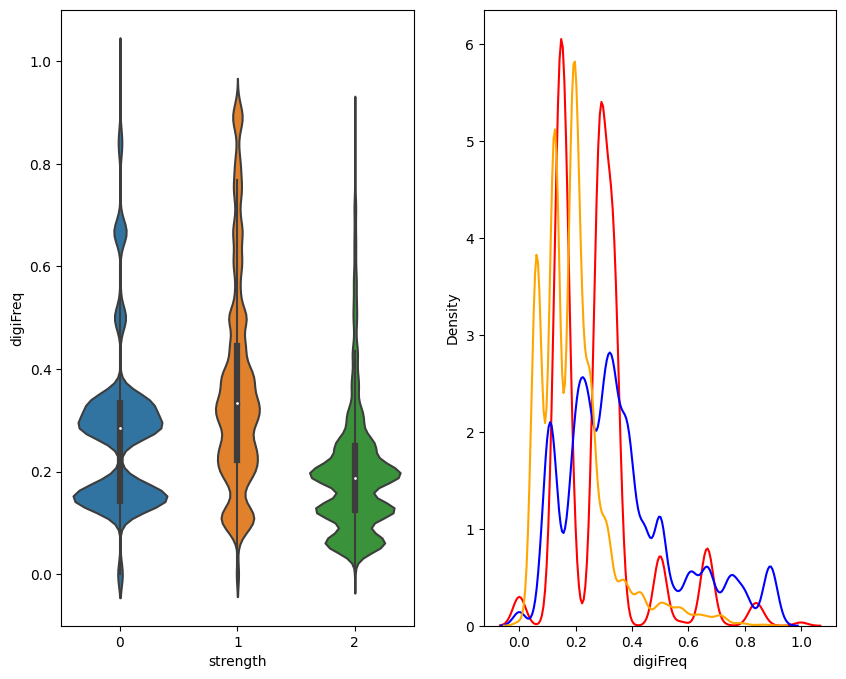

In [43]:
getDist(data, 'digiFreq')

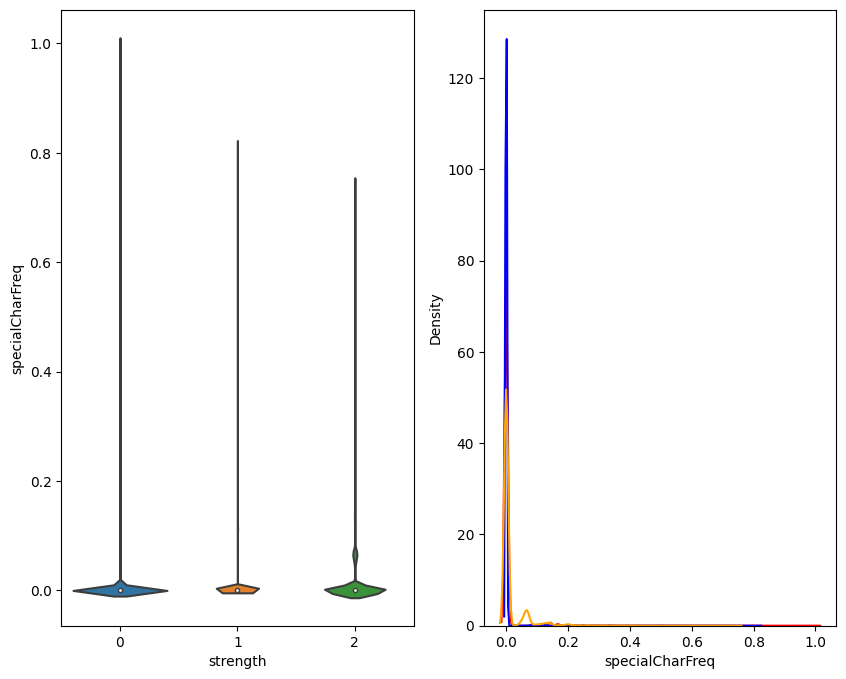

In [44]:
getDist(data, 'specialCharFreq')

In [45]:
data.head(4)

,password,strength,lowercaseFreq,uppercaseFreq,digiFreq,specialCharFreq,length
0,zxe870819,1,0.333,0.0,0.667,0.000,9
1,xw46454nr23l,1,0.417,0.0,0.583,0.000,12
2,soporte13,1,0.778,0.0,0.222,0.000,9
3,accounts6000webhost.com,2,0.783,0.0,0.174,0.043,23


# Apply Tf-IDF

its always good to shuffle the data


In [46]:
dataframe = data.sample(frac=1)

In [47]:
dataframe

,password,strength,lowercaseFreq,uppercaseFreq,digiFreq,specialCharFreq,length
17178,r18911,0,0.167,0.0,0.833,0.000,6
76433,lunatico1,1,0.889,0.0,0.111,0.000,9
75679,z68442,0,0.167,0.0,0.833,0.000,6
80327,panniers94,1,0.800,0.0,0.200,0.000,10
12420,tanin10,0,0.714,0.0,0.286,0.000,7
...,...,...,...,...,...,...,...
32454,tha_anja090309,2,0.500,0.0,0.429,0.071,14
28506,W6W5K6DY4NgvKE10,2,0.125,0.5,0.375,0.000,16
4412,qq147852qq,1,0.400,0.0,0.600,0.000,10
27589,project2012,1,0.636,0.0,0.364,0.000,11


In [48]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
x = list(dataframe['password'])

In [50]:
vectorizer = TfidfVectorizer(analyzer='char')

In [51]:
X = vectorizer.fit_transform(x)

In [52]:
X.shape   #sparse matrix shape(means more 0)

(100000, 99)

In [53]:
X.toarray()[0]  #vector representation of 1st password

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.78130426, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.38125817, 0.36412597,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33409302,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [54]:
len(vectorizer.get_feature_names_out())

99

In [55]:
df2 = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

In [56]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
